# Primer examen parcial - 5 min

## Data analysis

In [1]:
# Load libraries
import pandas as pd

### Loading data

In [2]:
pima = pd.read_csv('ds-home-5min-avg.csv')

In [3]:
pima.head()

,date,pre,hum,tem,occ
0,28/05/2020 09:30,94822.75,61.94,29.97,L
1,28/05/2020 02:25,94442.35,54.76,31.07,L
2,04/06/2020 10:00,94712.64,61.19,30.09,E
3,04/06/2020 05:45,94564.56,59.78,30.46,L
4,04/06/2020 09:35,94725.16,61.41,30.00,L


In [4]:
print(len(pima))

1005


### Data distribution

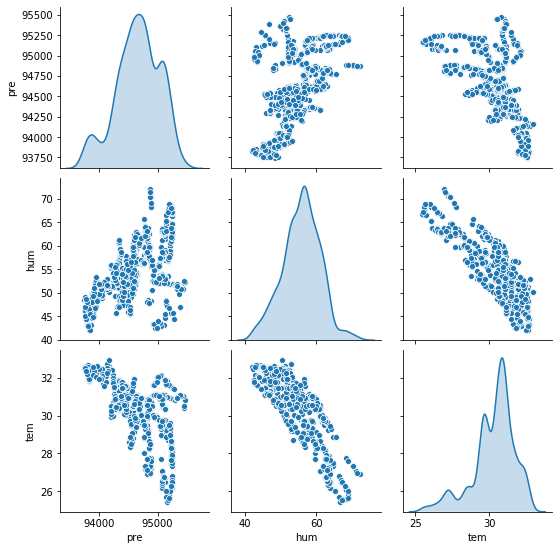

In [5]:
import seaborn as sns

# density
sns.pairplot(pima, diag_kind="kde")

### Correlation matrix

In [6]:
# Load libraries
import matplotlib.pylab as plt
%matplotlib inline

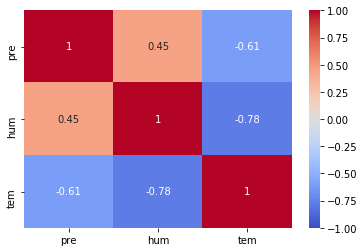

In [7]:
# correlation matrix
corr = pima.corr()

sns.heatmap(corr, annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

In [8]:
# Feature selection
feature_names = ['pre', 'hum', 'tem']
names = ['E', 'L', 'M', 'H']
X = pima[feature_names].to_numpy()
y = pima.occ.to_numpy()

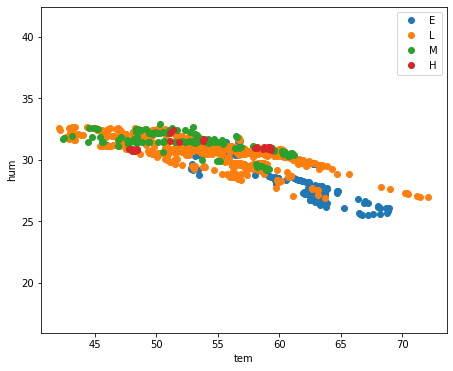

In [9]:
# Visualize the data sets
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
for target_name in names:
    X_plot = X[y == target_name]
    plt.plot(X_plot[:, 1], X_plot[:, 2], linestyle='none', marker='o', label=target_name)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[1])
plt.axis('equal')
plt.legend();

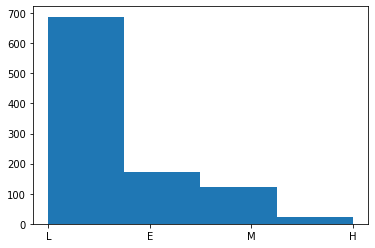

In [10]:
plt.hist(y, bins=4)
plt.show()

## Training the models

In [11]:
# Load libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics

### Decision tree

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
# Feature selection
feature_cols = ['pre', 'hum', 'tem']
X = pima[feature_cols]
y = pima.occ

In [14]:
print(len(X))

1005


In [15]:
# Split dataset into training set and test set
# 75% training and 25% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [16]:
# Create Decision Tree classifer object
tree_clf = DecisionTreeClassifier(max_depth=5)

# Train Decision Tree Classifer
tree_clf = tree_clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = tree_clf.predict(X_test)

In [17]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8333333333333334


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


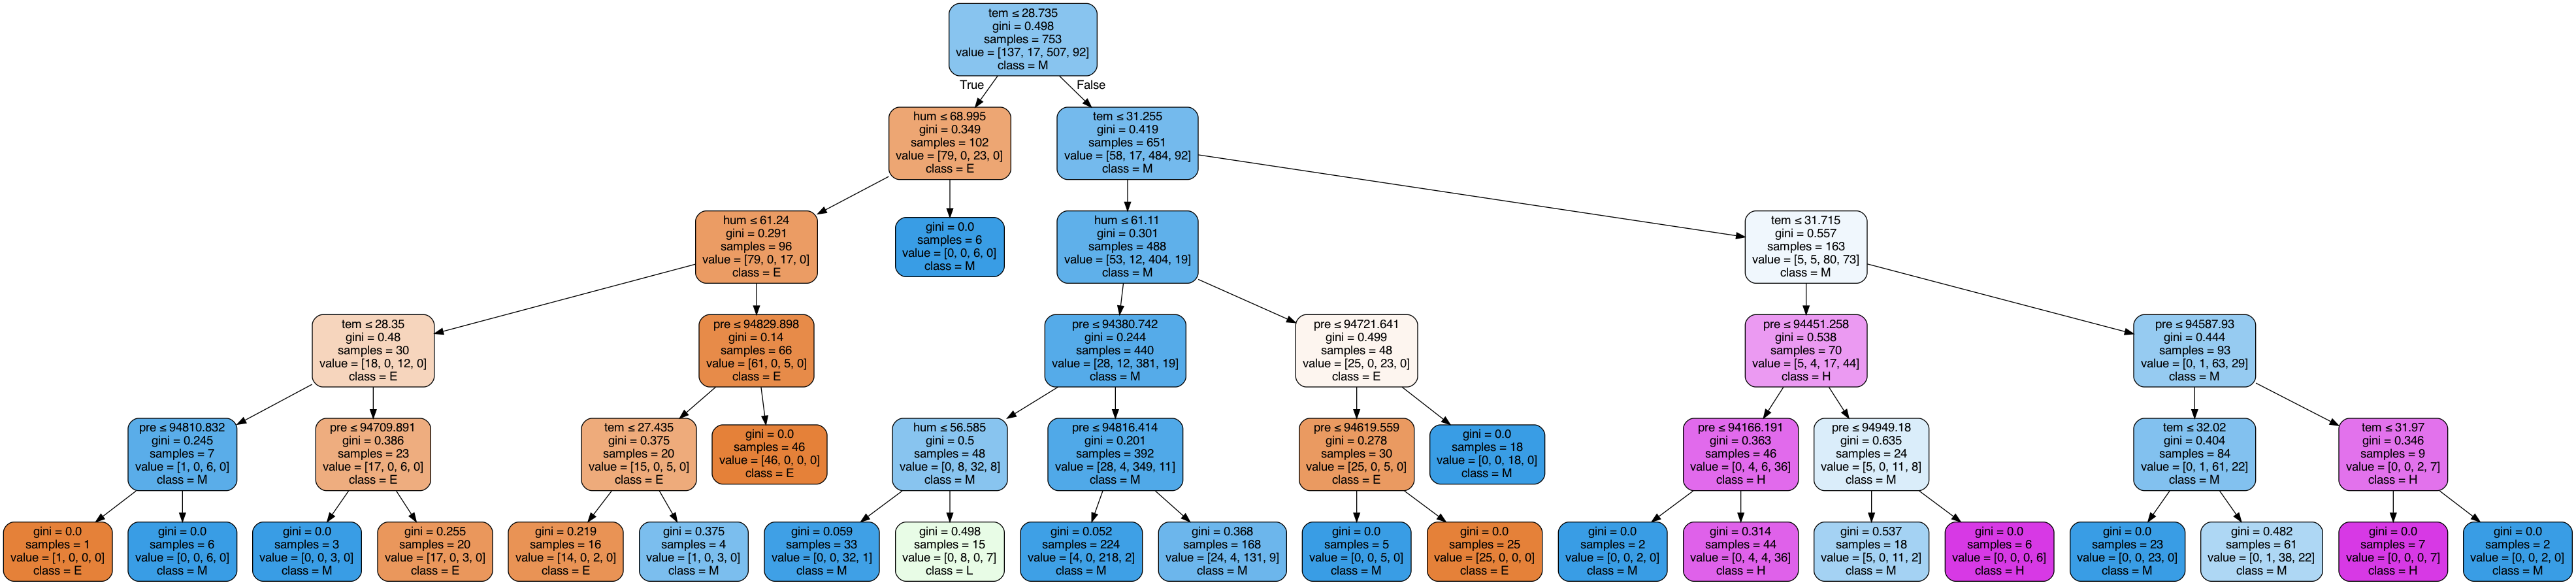

In [18]:
# Displaying tree
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(tree_clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['E', 'L', 'M', 'H'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('5min-tree.png')
Image(graph.create_png())

In [19]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 27,   0,   9,   0],
       [  0,   2,   3,   1],
       [  2,   0, 175,   4],
       [  0,   6,  17,   6]])

Text(0.5, 257.44, 'Predicted label')

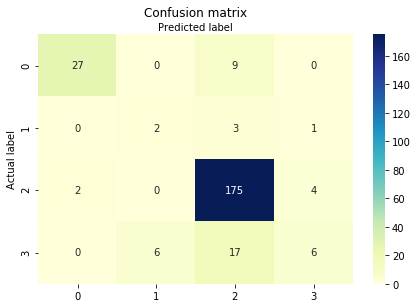

In [20]:
class_names = ['E', 'L', 'M', 'H']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [21]:
print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           E      0.931     0.750     0.831        36
           H      0.250     0.333     0.286         6
           L      0.858     0.967     0.909       181
           M      0.545     0.207     0.300        29

    accuracy                          0.833       252
   macro avg      0.646     0.564     0.581       252
weighted avg      0.818     0.833     0.813       252



### SVM

In [22]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

In [23]:
# Feature selection
feature_cols = ['pre', 'hum', 'tem']
X = pima[feature_cols]
y = pima.occ

In [24]:
# Split dataset into training set and test set
# 75% training and 25% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [25]:
svm_clf = LinearSVC(C=1, max_iter=10000)

In [26]:
svm_clf.fit(X_train, y_train)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=10000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [27]:
svm_clf.score(X_test, y_test)

0.7182539682539683

In [28]:
svm_rfb_clf = SVC(kernel='rbf', C=100, gamma=0.01)

In [29]:
svm_rfb_clf.fit(X_train, y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [30]:
svm_rfb_clf.score(X_test, y_test)

0.8373015873015873

In [31]:
y_pred = svm_rfb_clf.predict(X_test)

In [32]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 27,   0,   9,   0],
       [  1,   3,   1,   1],
       [  8,   2, 159,  12],
       [  0,   1,   6,  22]])

Text(0.5, 257.44, 'Predicted label')

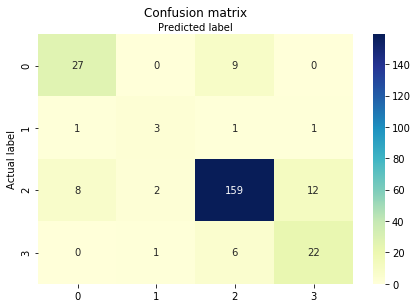

In [33]:
class_names = ['E', 'L', 'M', 'H']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [34]:
print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           E      0.750     0.750     0.750        36
           H      0.500     0.500     0.500         6
           L      0.909     0.878     0.893       181
           M      0.629     0.759     0.688        29

    accuracy                          0.837       252
   macro avg      0.697     0.722     0.708       252
weighted avg      0.844     0.837     0.840       252



### Neural net

In [35]:
# Load libraries
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [36]:
# Feature selection
feature_cols = ['pre', 'hum', 'tem']
X = pima[feature_cols]
y = pima.occ

In [37]:
# One hot encoding
enc = OneHotEncoder()
Y = enc.fit_transform(y[:, np.newaxis]).toarray()

# Scale data to have mean 0 and variance 1 
# which is importance for convergence of the neural network
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [38]:
# Split the data set into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=2)

n_features = X.shape[1]
n_classes = Y.shape[1]

In [39]:
# In order to ignore FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from keras.models import Sequential
from keras.layers import Dense

In [40]:
def create_custom_model(input_dim, output_dim, nodes, n=1, name='model'):
    # Create model
    model = Sequential(name=name)
    for i in range(n):
        model.add(Dense(nodes, input_dim=input_dim, activation='relu'))
    model.add(Dense(output_dim, activation='softmax'))

    # Compile model
    model.compile(loss='categorical_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])
    return model

nn_model = create_custom_model(n_features, n_classes, 12, n=5)

nn_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                48        
_________________________________________________________________
dense_1 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_2 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_3 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_4 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 52        
Total params: 724
Trainable params: 724
Non-trainable params: 0
_______________________________________________________________

In [41]:
from keras.callbacks import TensorBoard

history_dict = {}

# TensorBoard Callback
cb = TensorBoard()

print('Model name:', nn_model.name)
history_callback = nn_model.fit(X_train, Y_train,
                             batch_size=5,
                             epochs=300,
                             verbose=0,
                             validation_data=(X_test, Y_test),
                             callbacks=[cb])
score = nn_model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

history_dict[nn_model.name] = [history_callback, nn_model]

Model name: model
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
Test loss: 0.3486790359020233
Test accuracy: 0.8611111044883728


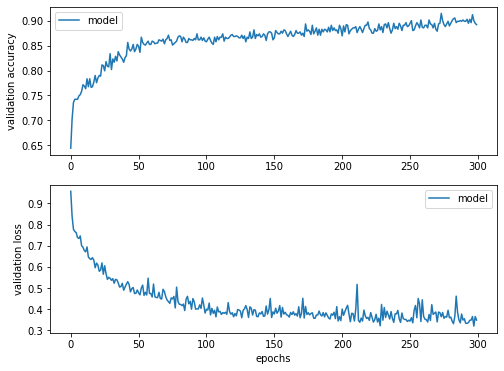

In [42]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

for model_name in history_dict:
    val_acc = history_dict[model_name][0].history['accuracy']
    val_loss = history_dict[model_name][0].history['val_loss']
    ax1.plot(val_acc, label=model_name)
    ax2.plot(val_loss, label=model_name)
    
ax1.set_ylabel('validation accuracy')
ax2.set_ylabel('validation loss')
ax2.set_xlabel('epochs')
ax1.legend()
ax2.legend()
plt.show()

In [43]:
y_pred = nn_model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [44]:
names = ['E', 'H', 'L', 'M']
y_pred = [names[i] for i in y_pred]

In [45]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[  6,   0,  26,   4],
       [  0,   0,   5,   1],
       [ 32,   1, 126,  22],
       [  9,   0,  18,   2]])

Text(0.5, 257.44, 'Predicted label')

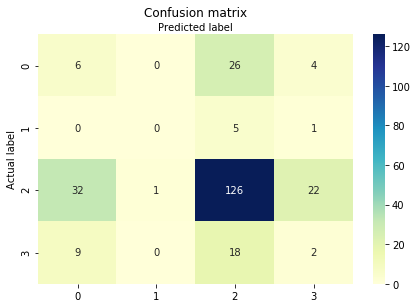

In [46]:
class_names = ['E', 'H', 'L', 'M']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [47]:
print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           E      0.128     0.167     0.145        36
           H      0.000     0.000     0.000         6
           L      0.720     0.696     0.708       181
           M      0.069     0.069     0.069        29

    accuracy                          0.532       252
   macro avg      0.229     0.233     0.230       252
weighted avg      0.543     0.532     0.537       252

